In [52]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [54]:
fare_values = dataset.loc[dataset['Fare'].notnull(), 'Fare'].values
print(fare_values.shape)

(891,)


In [56]:
max(fare_values)

512.3292

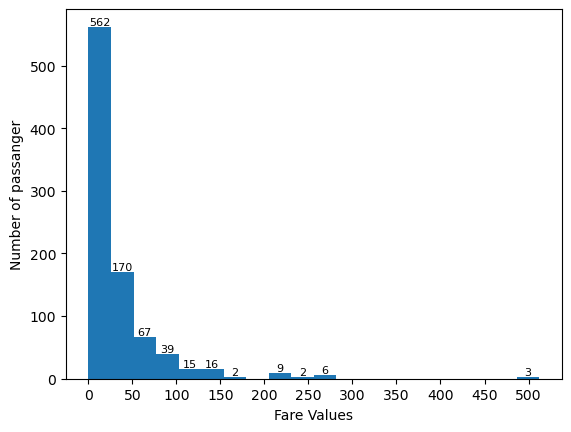

In [68]:
counts, bins, patches = plt.hist(fare_values, bins=20)
ticks = np.arange(0, 550, 50)
# Add annotations for the maximum values
for count, bin_edge in zip(counts, bins):
    if count > 0:
        plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, f'{int(count)}', 
                 ha='center', va='bottom', fontsize=8)
plt.xticks(ticks)
# Add x-axis description
plt.xlabel("Fare Values")
# Add y-axis description
plt.ylabel("Number of passanger")
plt.show()

In [74]:
top_3_fares = dataset.nlargest(3, 'Fare')[['Name', 'Fare']]

print(top_3_fares)

                                   Name      Fare
258                    Ward, Miss. Anna  512.3292
679  Cardeza, Mr. Thomas Drake Martinez  512.3292
737              Lesurer, Mr. Gustave J  512.3292


In [76]:
mean_fare = np.round(np.mean(fare_values))
print(mean_fare)


32.0


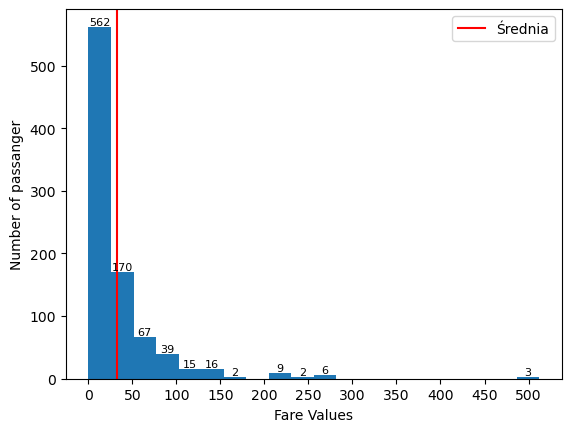

In [78]:
counts, bins, patches = plt.hist(fare_values, bins=20)
ticks = np.arange(0, 550, 50)
# Add annotations for the maximum values
for count, bin_edge in zip(counts, bins):
    if count > 0:
        plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, f'{int(count)}', 
                 ha='center', va='bottom', fontsize=8)
plt.xticks(ticks)
# Add x-axis description
plt.xlabel("Fare Values")
# Add y-axis description
plt.ylabel("Number of passanger")
# Add mean
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.legend(loc='upper right')
plt.show()

In [80]:
median_fare = np.median(fare_values)
print(median_fare)

14.4542


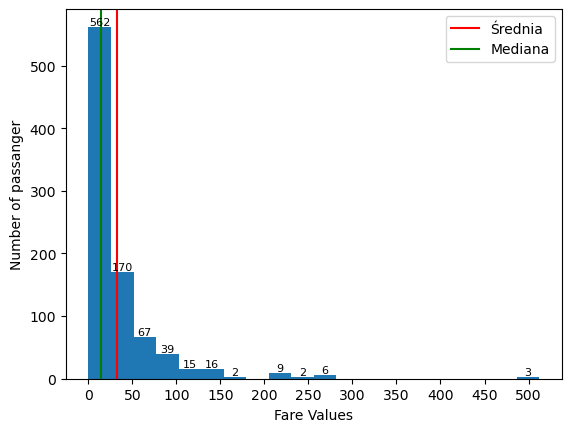

In [84]:
counts, bins, patches = plt.hist(fare_values, bins=20)
ticks = np.arange(0, 550, 50)
# Add annotations for the maximum values
for count, bin_edge in zip(counts, bins):
    if count > 0:
        plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, f'{int(count)}', 
                 ha='center', va='bottom', fontsize=8)
plt.xticks(ticks)
# Add x-axis description
plt.xlabel("Fare Values")
# Add y-axis description
plt.ylabel("Number of passanger")
# Add mean
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
# Add median
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.legend(loc='upper right')
plt.show()

In [88]:
mode_fare = stats.mode(fare_values)
print(mode_fare)

ModeResult(mode=8.05, count=43)


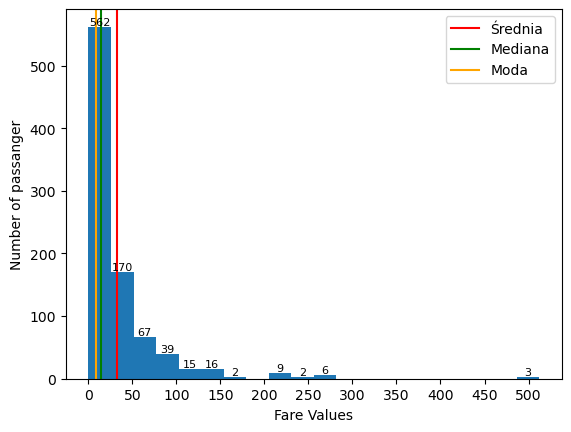

In [94]:
counts, bins, patches = plt.hist(fare_values, bins=20)
ticks = np.arange(0, 550, 50)
# Add annotations for the maximum values
for count, bin_edge in zip(counts, bins):
    if count > 0:
        plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, f'{int(count)}', 
                 ha='center', va='bottom', fontsize=8)
plt.xticks(ticks)
# Add x-axis description
plt.xlabel("Fare Values")
# Add y-axis description
plt.ylabel("Number of passanger")
# Add mean
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
# Add median
plt.axvline(x = median_fare, color='green', label = 'Mediana')
# Add moda
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
plt.legend(loc='upper right')
plt.show()

In [96]:
q0 = np.quantile(fare_values, 0.0)
q1 = np.round(np.quantile(fare_values, 0.25))
q3 = np.round(np.quantile(fare_values, 0.75))
q4 = np.round(np.quantile(fare_values, 1.0))
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_fare}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 0.0
Q1: 8.0
Q2: 14.4542
Q3: 31.0
Q4: 512.0


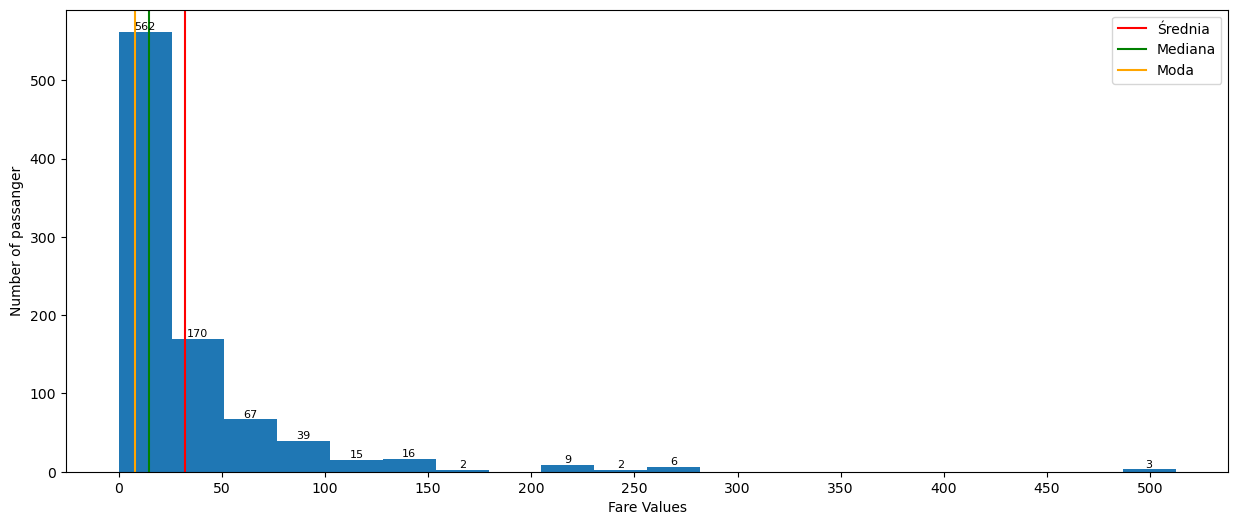

In [112]:
plt.figure(figsize=(15, 6))
counts, bins, patches = plt.hist(fare_values, bins=20)
ticks = np.arange(0, 550, 50)
# Add annotations for the maximum values
for count, bin_edge in zip(counts, bins):
    if count > 0:
        plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, f'{int(count)}', 
                 ha='center', va='bottom', fontsize=8)
plt.xticks(ticks)
# Add x-axis description
plt.xlabel("Fare Values")
# Add y-axis description
plt.ylabel("Number of passanger")
# Add mean
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
# Add median
plt.axvline(x = median_fare, color='green', label = 'Mediana')
# Add moda
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
plt.legend(loc='upper right')
plt.show()

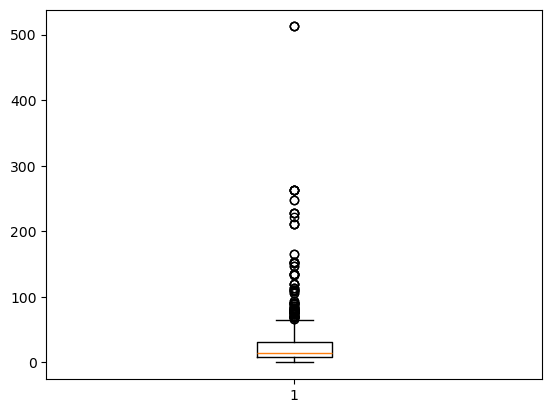

In [114]:
plt.boxplot(fare_values)
plt.show()

In [116]:
standard_deviation_fare = np.std(fare_values, ddof=1)
print(standard_deviation_fare)

49.6934285971809


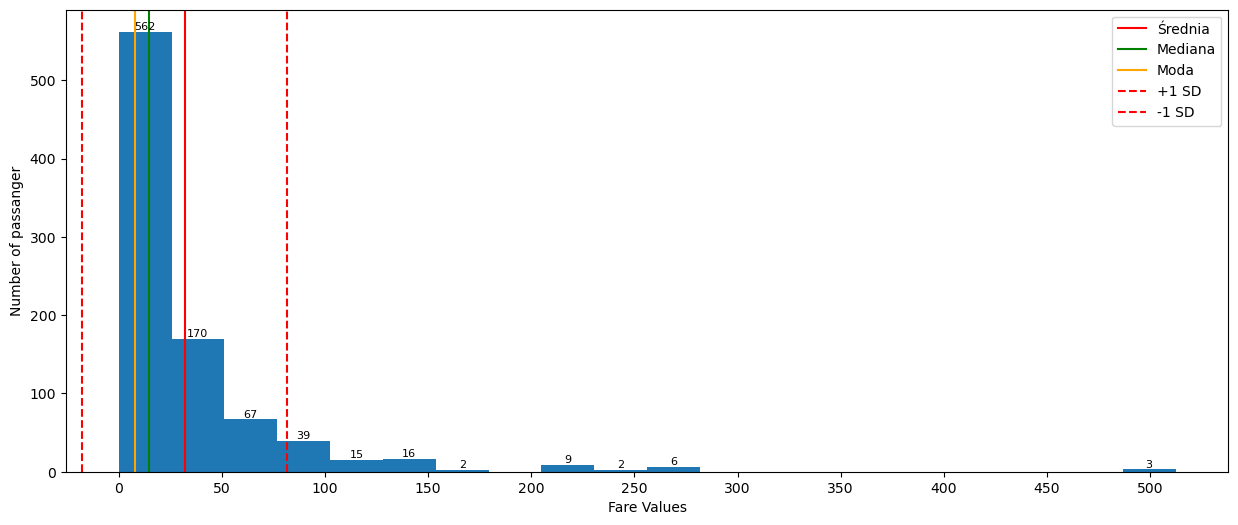

In [118]:
plt.figure(figsize=(15, 6))
counts, bins, patches = plt.hist(fare_values, bins=20)
ticks = np.arange(0, 550, 50)
# Add annotations for the maximum values
for count, bin_edge in zip(counts, bins):
    if count > 0:
        plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, f'{int(count)}', 
                 ha='center', va='bottom', fontsize=8)
plt.xticks(ticks)
# Add x-axis description
plt.xlabel("Fare Values")
# Add y-axis description
plt.ylabel("Number of passanger")
# Add mean
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
# Add median
plt.axvline(x = median_fare, color='green', label = 'Mediana')
# Add moda
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
#Add SD
plt.axvline(mean_fare + standard_deviation_fare, color='red', linestyle='dashed', label='+1 SD')
plt.axvline(mean_fare - standard_deviation_fare, color='red', linestyle='dashed', label='-1 SD')
plt.legend(loc='upper right')
plt.show()